Use R.A. Fisher Iris Plant Database: find correlations within data, generate simple linear regression model, generate random sample of points and see how good the model is at identifying what species it would correspond to. 

author: M.A.Barrios
ver 0 date: Feb. 25, 2017  

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/Users/mbarr/Documents/0_Data Science/Iris data/')
# load data
iris=pd.read_csv('bezdekIris.csv', names=['spl_len','spl_width','ptl_len','ptl_width','id'])
iris.head()

In [4]:
iris.describe()

,spl_len,spl_width,ptl_len,ptl_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# find unique id names
id_uniq=iris.id.unique()
print(id_uniq)

%matplotlib inline

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


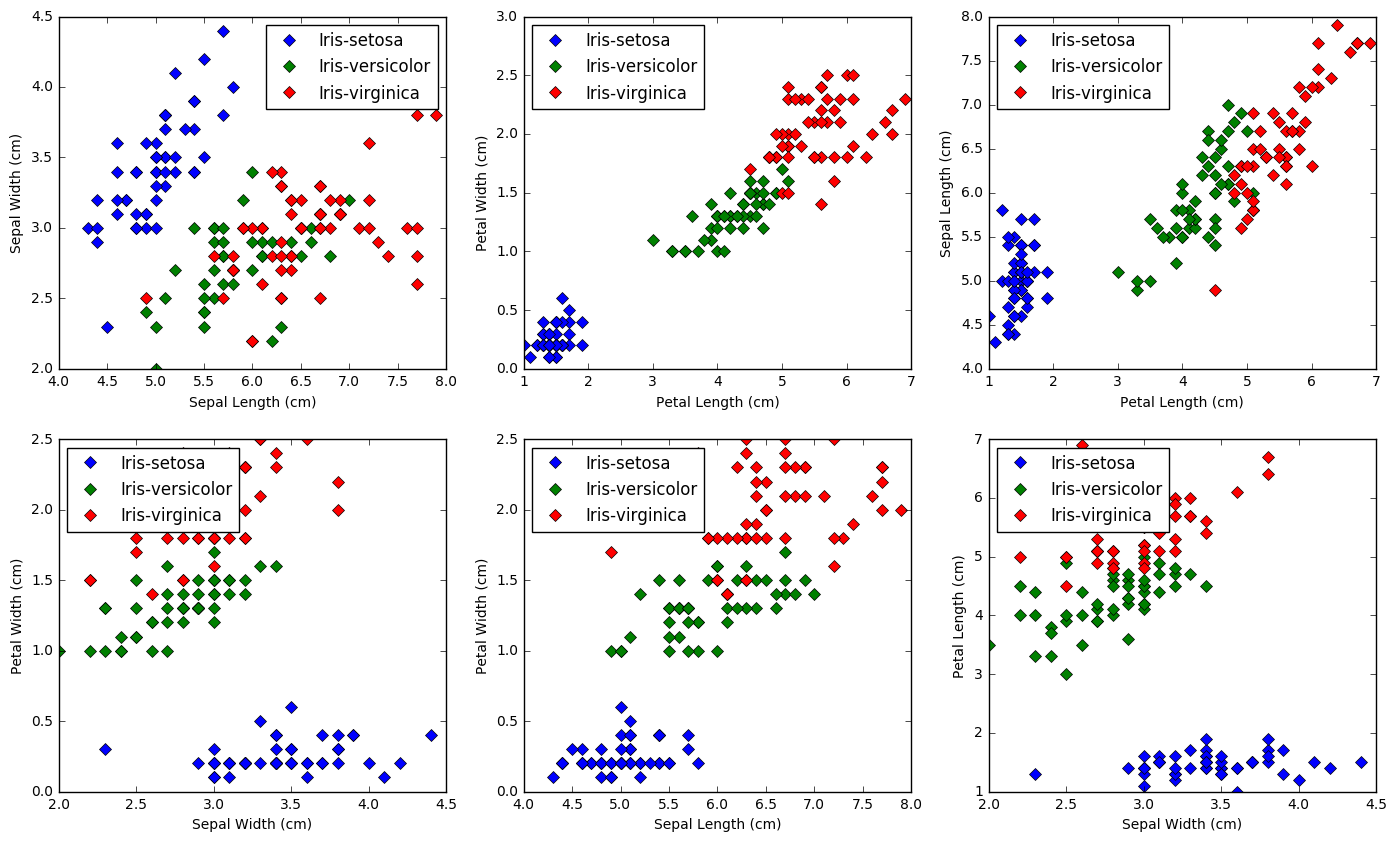

In [6]:
# ----- plot different quantities -----
# (n-1)! unique plots = 6

# sepal measurements
fig=plt.figure(figsize=(17,10))
ax=fig.add_subplot(231)
for id in id_uniq:
    ax.plot(iris.spl_len[iris.id==id], iris.spl_width[iris.id==id], 
            label=id, marker='D', linestyle='none')
ax.legend(numpoints=1)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

#petal measurements
#fig=plt.figure()
ax=fig.add_subplot(232)
for id in id_uniq:
    ax.plot(iris.ptl_len[iris.id==id], iris.ptl_width[iris.id==id], 
            label=id, marker='D', linestyle='none')
ax.legend(numpoints=1, loc='upper left')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_ylim([0, 1.2*max(iris.ptl_width)])

# sepal and petal lengths 
#fig=plt.figure()
ax=fig.add_subplot(233)
for id in id_uniq:
    ax.plot(iris.ptl_len[iris.id==id], iris.spl_len[iris.id==id], 
            label=id, marker='D', linestyle='none')
ax.legend(numpoints=1, loc='upper left')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Sepal Length (cm)')

# sepal and petal widths 
#fig=plt.figure()
ax=fig.add_subplot(234)
for id in id_uniq:
    ax.plot( iris.spl_width[iris.id==id], iris.ptl_width[iris.id==id],
            label=id, marker='D', linestyle='none')
ax.legend(numpoints=1, loc='upper left')
ax.set_ylabel('Petal Width (cm)')
ax.set_xlabel('Sepal Width (cm)')

# sepal length and petal width
#fig=plt.figure()
ax=fig.add_subplot(235)
for id in id_uniq:
    ax.plot(iris.spl_len[iris.id==id], iris.ptl_width[iris.id==id], 
            label=id, marker='D', linestyle='none')
ax.legend(numpoints=1, loc='upper left')
ax.set_ylabel('Petal Width (cm)')
ax.set_xlabel('Sepal Length (cm)')

# sepal width and petal length
#fig=plt.figure()
ax=fig.add_subplot(236)
for id in id_uniq:
    ax.plot(iris.spl_width[iris.id==id], iris.ptl_len[iris.id==id],
            label=id, marker='D', linestyle='none')
ax.legend(numpoints=1, loc='upper left')
ax.set_ylabel('Petal Length (cm)')
ax.set_xlabel('Sepal Width (cm)')


In [ ]:
# above quick look of data shows the petal length and petal width have 
# a high correlation every each class (species).  More clearly shown when
# you look at correlation and class statistics. 

In [7]:
iris.corr()

,spl_len,spl_width,ptl_len,ptl_width
spl_len,1.000000,-0.117570,0.871754,0.817941
spl_width,-0.117570,1.000000,-0.428440,-0.366126
ptl_len,0.871754,-0.428440,1.000000,0.962865
ptl_width,0.817941,-0.366126,0.962865,1.000000


In [8]:
# mean per class
iris.groupby('id').mean()

,spl_len,spl_width,ptl_len,ptl_width
id,,,,
Iris-setosa,5.006,3.428,1.462,0.246
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [9]:
# standard deviation per class
iris.groupby('id').std()

,spl_len,spl_width,ptl_len,ptl_width
id,,,,
Iris-setosa,0.352490,0.379064,0.173664,0.105386
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [12]:
# usage: fit data to polynomial fit of order n, generates list of model x,y values to plot,
# estimate of the one sigma of the fit, the fitting coefficients, and residuals(at data x vals )
def PolyFitWSigma(xvar, yvar, order, numpts):
    # --- linear regression: petal length and width ------
    Coeff,Cv=np.polyfit(xvar, yvar, order, cov=True)

    # generate array x values: (mix, max, numpoint)
    x=np.linspace(min(xvar), max(xvar), numpts)

    # stack matrices(vertically) of poly components w/o coeffs, then traspose
    YY=np.vstack([x**(order-i) for i in range(order+1)]).T
    # evaluated polynomial values of fit
    y=np.dot(YY, Coeff)
    # y values of covariance matrix
    yCov=np.dot(YY, np.dot(Cv,YY.T))
    ySigma=np.sqrt(np.diag(yCov))
    
    # calcualte residuals
    model=np.interp(xvar, x, y)
    Residual=yvar-model
    
    return x, y, ySigma, Coeff, Residual


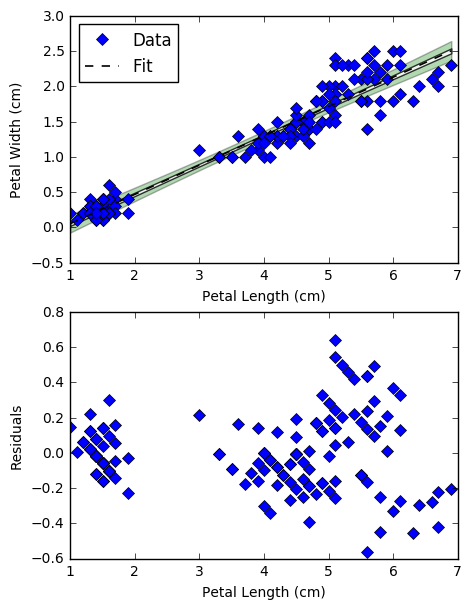

In [88]:
xPlPw,yPlPw,ySigma,CoeffPlPw,res=PolyFitWSigma(iris.ptl_len, iris.ptl_width, 1, 50)

# data with fit, shaded regions show 1-sigma and 4-sigma values
fig=plt.figure(figsize=(5,7))
ax=fig.add_subplot(211)
ax.plot(iris.ptl_len, iris.ptl_width, marker='D', linestyle='None', label='Data')
ax.fill_between(xPlPw, yPlPw+4*ySigma, yPlPw-4*ySigma, facecolor='g', alpha=0.3)
ax.fill_between(xPlPw, yPlPw+ySigma, yPlPw-ySigma, facecolor='w', alpha=.8)
ax.plot(xPlPw,yPlPw, label='Fit', color='k', linewidth=1.2, linestyle='--')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.legend(numpoints=1, loc='upper left')

ax=fig.add_subplot(212)
ax.plot(iris.ptl_len,res,marker='D', linestyle='None')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Residuals')

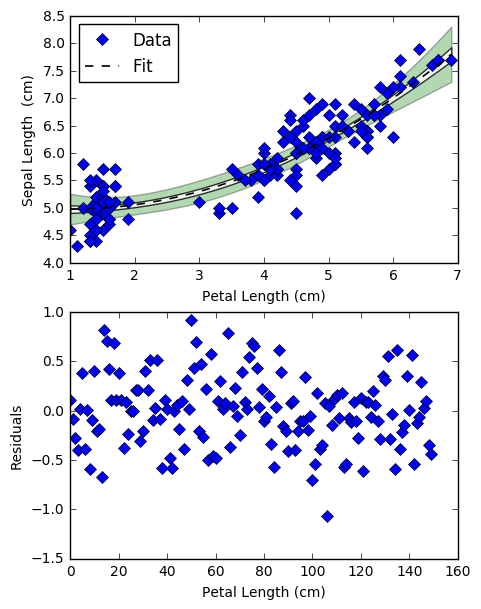

In [28]:
x1,y1,ySigma1,CoeffPlSl,res1=PolyFitWSigma(iris.ptl_len, iris.spl_len, 2, 50)

fig=plt.figure(figsize=(5,7))
ax=fig.add_subplot(211)
ax.plot(iris.ptl_len, iris.spl_len, marker='D', linestyle='None', label='Data')
ax.fill_between(x1, y1+4*ySigma1, y1-4*ySigma1, facecolor='g', alpha=0.3)
ax.fill_between(x1, y1+ySigma1, y1-ySigma1, facecolor='w', alpha=.8)
ax.plot(x1,y1, label='Fit', color='k', linewidth=1.2, linestyle='--')

ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Sepal Length  (cm)')
ax.legend(numpoints=1, loc='upper left')

ax=fig.add_subplot(212)
ax.plot(res1,marker='D', linestyle='None' )
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Residuals')

In [64]:
# ---- fit data that is distinct for each species --------- 
# let's do petal width(sepal width)

for id in id_uniq:
    xMod,yMod,ySigma,Coeffs,resMod=PolyFitWSigma(iris.spl_width[iris.id==id], 
                                                 iris.ptl_width[iris.id==id], 1, 50)
    name_id=id[5:]
    if id == id_uniq[0]:
        FitsSplWPltW={name_id:{'xFit':xMod,'yFit':yMod ,'Sigma':ySigma,'Coeffs': Coeffs,'res':resMod }}
    else:
        FitsSplWPltW[name_id]={'xFit':xMod,'yFit':yMod ,'Sigma':ySigma,'Coeffs': Coeffs,'res':resMod }

(-0.8, 0.8)

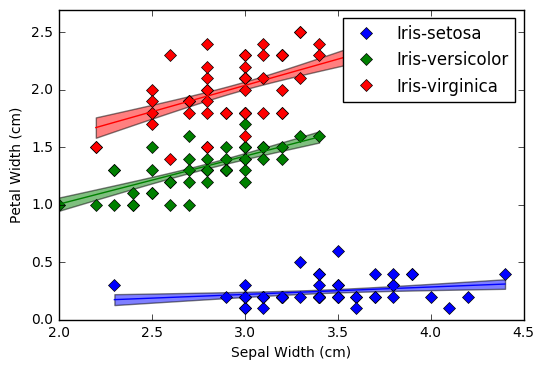

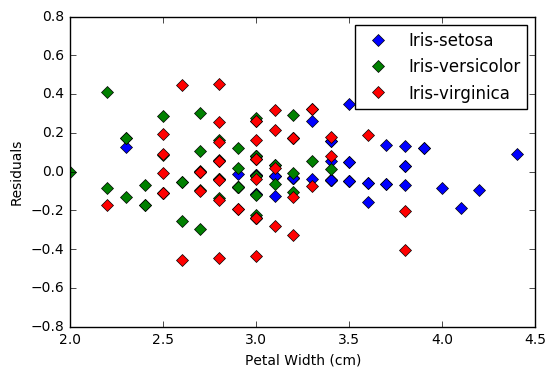

In [77]:
# ------- plot fit results ------ 
fig=plt.figure()
ax=fig.add_subplot(111)
cols=['b','g','r']
for id in id_uniq:
    ax.plot( iris.spl_width[iris.id==id], iris.ptl_width[iris.id==id],
            label=id, marker='D', linestyle='none', color=cols[np.where(id_uniq==id)[0][0]%3])
    ax.plot(FitsSplWPltW[id[5:]]['xFit'],FitsSplWPltW[id[5:]]['yFit'], color=cols[np.where(id_uniq==id)[0][0]%3])
    ax.fill_between(FitsSplWPltW[id[5:]]['xFit'],
      FitsSplWPltW[id[5:]]['yFit']-FitsSplWPltW[id[5:]]['Sigma'],
      FitsSplWPltW[id[5:]]['yFit']+FitsSplWPltW[id[5:]]['Sigma'], 
      facecolor=cols[np.where(id_uniq==id)[0][0]%3], alpha=0.5)
ax.legend(numpoints=1, loc='upper right')
ax.set_ylabel('Petal Width (cm)')
ax.set_xlabel('Sepal Width (cm)')
ax.set_ylim([0,2.7])

# ---- plot fit residuals ------- 
fig=plt.figure()
ax=fig.add_subplot(111)
for id in id_uniq:
    ax.plot(iris.spl_width[iris.id==id],FitsSplWPltW[id[5:]]['res'], label=id, marker='D',
               linestyle='none')
ax.legend(numpoints=1, loc='upper right')
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Residuals')
ax.set_ylim([-.8,.8])

In [138]:
# ------ Generate data to test -------
delL=max(iris.ptl_len)-min(iris.ptl_len)
Npts=50
PtLenIn=delL*np.random.random_sample((Npts,))+min(iris.ptl_len)

SgmFac=np.random.randint(-10,high=10,size=Npts)
PtWIn=np.interp(PtLenIn,xPlPw,yPlPw)+ np.interp(PtLenIn,xPlPw,ySigma)*SgmFac

SgmFac=np.random.randint(-10,high=10,size=Npts)
SpLenIn=np.interp(PtLenIn,x1,y1)+ np.interp(PtLenIn, x1, ySigma1)*SgmFac

delL=max(iris.spl_width)-min(iris.spl_width)
SpWIn=delL*np.random.random_sample((Npts,))+min(iris.spl_width)

# store input variables in data frame
GenInD=pd.DataFrame({'spl_len':SpLenIn,'spl_width':SpWIn,'ptl_len':PtLenIn,'ptl_width': PtWIn })

(0, 4.5)

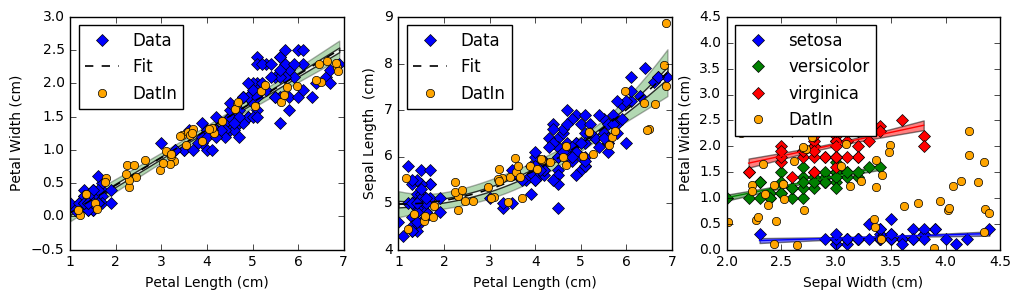

In [139]:
fig=plt.figure(figsize=(12,3))
ax=fig.add_subplot(131)
# petal width vs. petal length
ax.plot(iris.ptl_len, iris.ptl_width, marker='D', linestyle='None', label='Data')
ax.fill_between(xPlPw, yPlPw+4*ySigma, yPlPw-4*ySigma, facecolor='g', alpha=0.3)
ax.fill_between(xPlPw, yPlPw+ySigma, yPlPw-ySigma, facecolor='w', alpha=.8)
ax.plot(xPlPw,yPlPw, label='Fit', color='k', linewidth=1.2, linestyle='--')
ax.plot(GenInD.ptl_len, GenInD.ptl_width, label='DatIn', linestyle='none', color='orange', marker='o')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.legend(numpoints=1, loc='upper left')

# sepal length vs. petal length
ax=fig.add_subplot(132)
ax.plot(iris.ptl_len, iris.spl_len, marker='D', linestyle='None', label='Data')
ax.fill_between(x1, y1+4*ySigma1, y1-4*ySigma1, facecolor='g', alpha=0.3)
ax.fill_between(x1, y1+ySigma1, y1-ySigma1, facecolor='w', alpha=.8)
ax.plot(x1,y1, label='Fit', color='k', linewidth=1.2, linestyle='--')
ax.plot(GenInD.ptl_len, GenInD.spl_len, linestyle='none', marker='o', color='Orange', label='DatIn')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Sepal Length  (cm)')
ax.legend(numpoints=1, loc='upper left')

# ----- petal width vs. septal width
ax=fig.add_subplot(133)
cols=['b','g','r']
for id in id_uniq:
    ax.plot( iris.spl_width[iris.id==id], iris.ptl_width[iris.id==id],
            label=id[5:], marker='D', linestyle='none', color=cols[np.where(id_uniq==id)[0][0]%3])
    ax.plot(FitsSplWPltW[id[5:]]['xFit'],FitsSplWPltW[id[5:]]['yFit'], color=cols[np.where(id_uniq==id)[0][0]%3])
    ax.fill_between(FitsSplWPltW[id[5:]]['xFit'],
      FitsSplWPltW[id[5:]]['yFit']-FitsSplWPltW[id[5:]]['Sigma'],
      FitsSplWPltW[id[5:]]['yFit']+FitsSplWPltW[id[5:]]['Sigma'], 
      facecolor=cols[np.where(id_uniq==id)[0][0]%3], alpha=0.5)
ax.plot(GenInD.spl_width, GenInD.ptl_width, linestyle='none', marker='o', color='Orange', label='DatIn')
ax.legend(numpoints=1, loc='upper left')
ax.set_ylabel('Petal Width (cm)')
ax.set_xlabel('Sepal Width (cm)')
ax.set_ylim([0,4.5])

In [175]:
# simple function--look at residuals between model and input data, classify data by
# minimum residual value
M=np.vstack([abs(GenInD.ptl_width-
             np.interp(GenInD.spl_width,FitsSplWPltW[id[5:]]['xFit'],FitsSplWPltW[id[5:]]['yFit'])) for id in id_uniq]).T
index=[np.where(M[i]==min(M[i]))[0][0] for i in np.arange(len(M)) ]
idOut=[id_uniq[ind] for ind in index]
# add id to data frame
GenInD['id']=idOut

(0, 6.2)

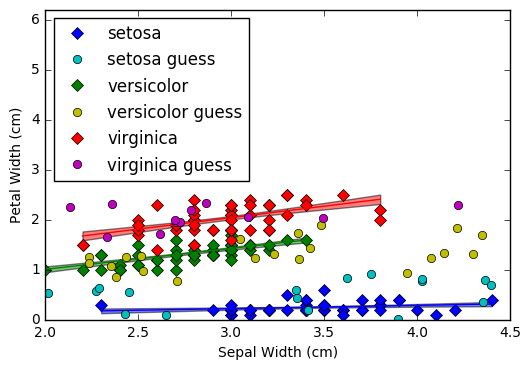

In [181]:
# plot model results by color
fig=plt.figure()
ax=fig.add_subplot(111)
cols=['b','g','r']
guess_cols=['c','y','m']
for id in id_uniq:
    ax.plot( iris.spl_width[iris.id==id], iris.ptl_width[iris.id==id],
            label=id[5:], marker='D', linestyle='none', color=cols[np.where(id_uniq==id)[0][0]%3])
    ax.plot(FitsSplWPltW[id[5:]]['xFit'],FitsSplWPltW[id[5:]]['yFit'], color=cols[np.where(id_uniq==id)[0][0]%3])
    ax.fill_between(FitsSplWPltW[id[5:]]['xFit'],
      FitsSplWPltW[id[5:]]['yFit']-FitsSplWPltW[id[5:]]['Sigma'],
      FitsSplWPltW[id[5:]]['yFit']+FitsSplWPltW[id[5:]]['Sigma'], 
      facecolor=cols[np.where(id_uniq==id)[0][0]%3], alpha=0.5)
    ax.plot(GenInD.spl_width[GenInD.id==id], GenInD.ptl_width[GenInD.id==id], linestyle='none', 
           marker='o', color=guess_cols[np.where(id_uniq==id)[0][0]%3], label=id[5:]+' guess')
ax.legend(numpoints=1, loc='upper left')
ax.set_ylabel('Petal Width (cm)')
ax.set_xlabel('Sepal Width (cm)')
ax.set_ylim([0,6.2])

In [ ]:
# --- stale functions after modifications in code ... keeping just for reference ------ 

# def GenDatPolyFit(coeffs, MinVal,MaxVal, npt):
#     xVal=np.arange(npt)*((MaxVal-MinVal)/(npt-1))+MinVal
#     for i in np.arange(len(coeffs)):
#         if i==0:
#             yVal=coeffs[i]*xVal**(len(coeffs)-i-1)
#         else:
#             yVal=yVal+coeffs[i]*xVal**(len(coeffs)-i-1)
#     return [xVal,yVal]

# x,y=GenDatPolyFit(linFit[0], 0,7,20)

# iris.keys()[0]